In [1]:
import sklearn
import seaborn as sns
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

Q1: Exploratory Data Analysis (5 Pts)

Get familiar with the dataset by exploring the different features, their distribution, and the labels. Check for common pitfalls like missing or nonsensical data, unusual feature distribution, outliers, or class imbalance, and describe how to handle them. After having familiarized yourself with the data, explain how you preprocess the dataset for the remaining tasks of part 1. Interpretability and explainability aim at gaining more insights about the data than just optimizing predictive performance. A first simple step is to have a look at the (linear) dependencies of the variables. Visualize the pairwise correlation matrix and describe which features seem to be important for predicting the label.

In [2]:
df = pd.read_csv("train_val_split.csv")

df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   37   M           ATA        130          283          0         ST     98   
2   48   F           ASY        138          214          0     Normal    108   
3   54   M           NAP        150          195          0     Normal    122   
4   39   M           NAP        120          339          0     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      0.0       Up             0  
2              Y      1.5     Flat             1  
3              N      0.0       Up             0  
4              N      0.0       Up             0

In [3]:
for i in df.columns:
    print(i , df[i].nunique())

Age 49
Sex 2
ChestPainType 4
RestingBP 64
Cholesterol 204
FastingBS 2
RestingECG 3
MaxHR 115
ExerciseAngina 2
Oldpeak 50
ST_Slope 3
HeartDisease 2


In [4]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           734.0   53.523161    9.421110  29.0   47.00   54.0   60.0   77.0
RestingBP     734.0  132.062670   18.618490   0.0  120.00  130.0  140.0  200.0
Cholesterol   734.0  197.588556  108.979439   0.0  172.25  222.0  267.0  529.0
FastingBS     734.0    0.232970    0.423012   0.0    0.00    0.0    0.0    1.0
MaxHR         734.0  136.167575   25.334552  60.0  120.00  138.0  155.0  195.0
Oldpeak       734.0    0.873978    1.082222  -2.0    0.00    0.5    1.5    6.2
HeartDisease  734.0    0.542234    0.498553   0.0    0.00    1.0    1.0    1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [6]:
ok = df[df.Cholesterol != 0]
deprecated = df[df.Cholesterol == 0]

print("{} are useful \n".format(len(ok)))
print("{} have value 0 in Cholesterol feature \n".format(len(deprecated)))

593 are useful 

141 have value 0 in Cholesterol feature 



In [7]:
# not removing the 0 cholesterol values
# df = ok

In [8]:
noOldPeak = df[df.Oldpeak == 0]

print("{} have value 0 in Oldpeak feature \n".format(len(noOldPeak)))

305 have value 0 in Oldpeak feature 



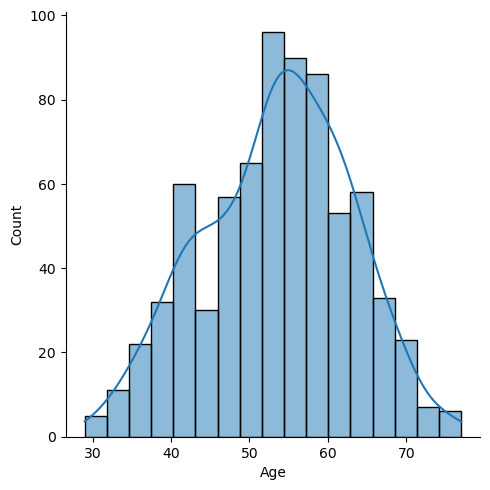

In [9]:
sns.displot(df['Age'] , kde = True)

<Axes: >

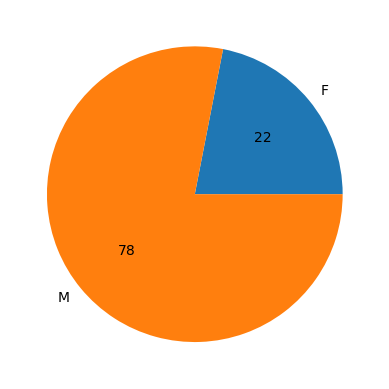

In [10]:
df.groupby('Sex').size().plot(kind = 'pie' , autopct = '%.0f')

Correlation

In [11]:
df.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.240539    -0.125336   0.199419 -0.373784  0.262889   
RestingBP     0.240539   1.000000     0.105258   0.102769 -0.110562  0.166465   
Cholesterol  -0.125336   0.105258     1.000000  -0.253459  0.234045  0.049687   
FastingBS     0.199419   0.102769    -0.253459   1.000000 -0.090212  0.061538   
MaxHR        -0.373784  -0.110562     0.234045  -0.090212  1.000000 -0.171323   
Oldpeak       0.262889   0.166465     0.049687   0.061538 -0.171323  1.000000   
HeartDisease  0.294751   0.101420    -0.253538   0.254086 -0.405552  0.420891   

              HeartDisease  
Age               0.294751  
RestingBP         0.101420  
Cholesterol      -0.253538  
FastingBS         0.254086  
MaxHR            -0.405552  
Oldpeak           0.420891  
HeartDisease      1.000000

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

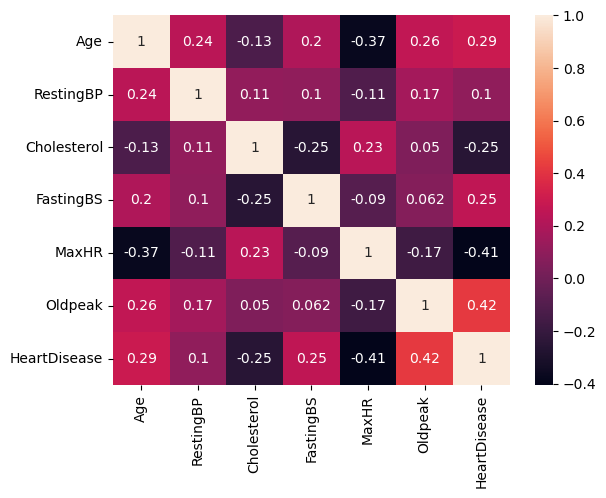

In [12]:
sns.heatmap(df.corr(),annot=True)

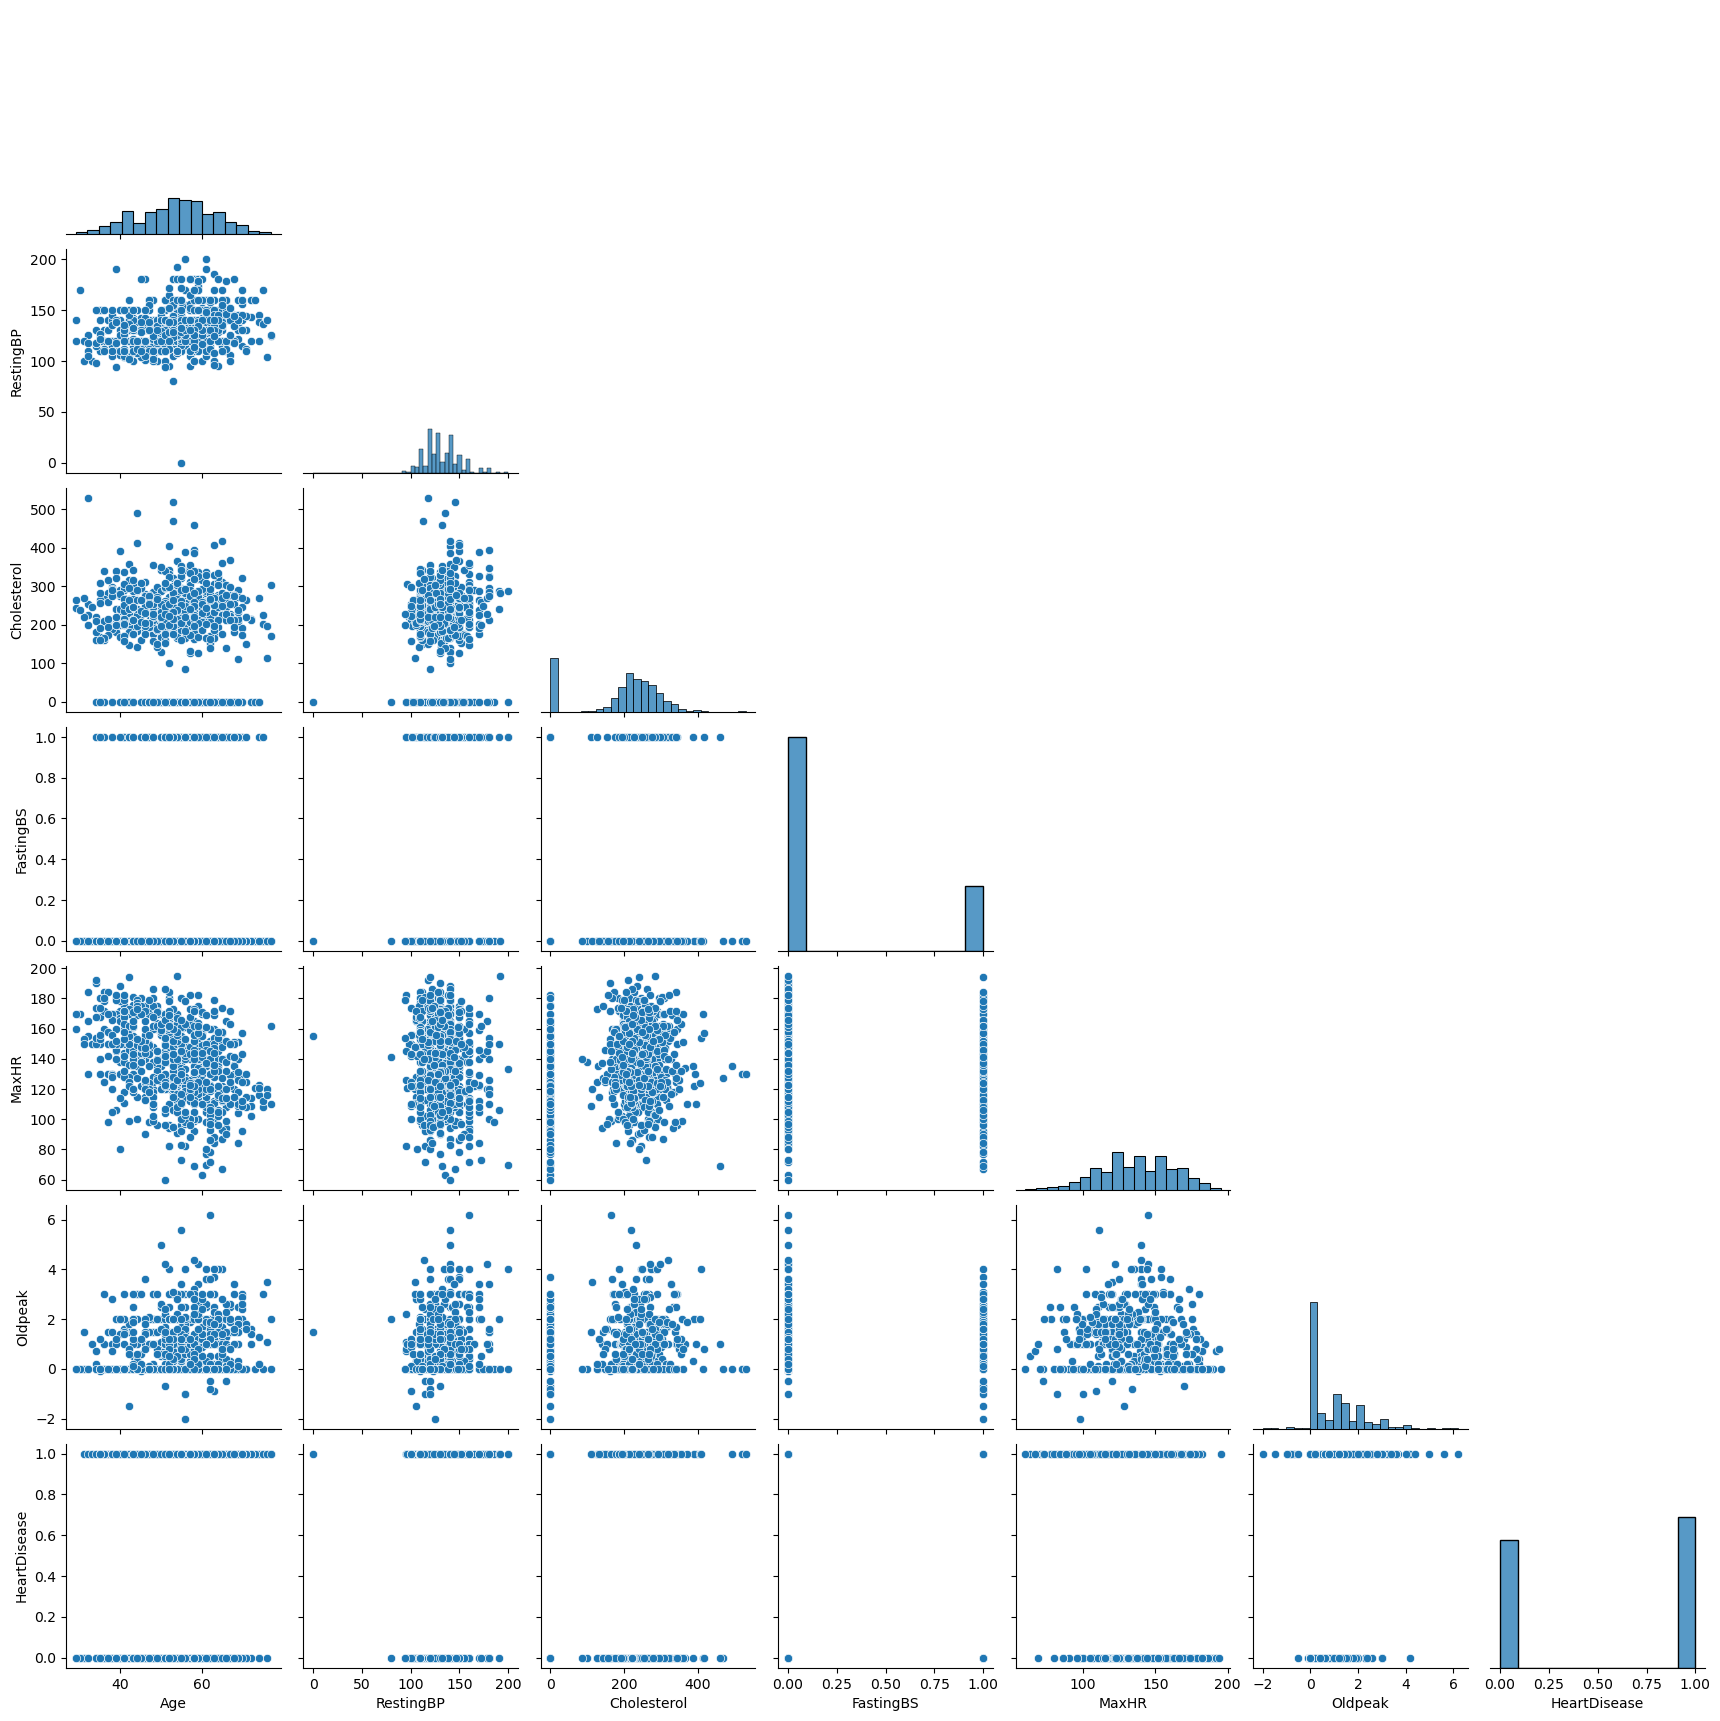

In [13]:
#sns.pairplot(df)
sns.pairplot(df,corner=True)

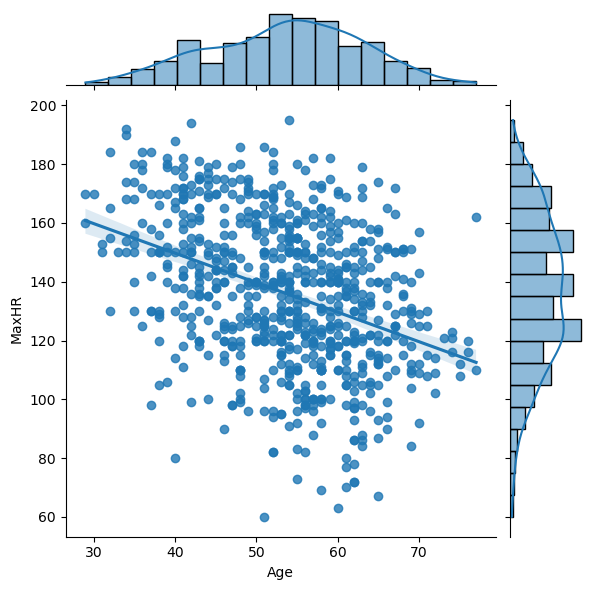

In [14]:
sns.jointplot(x = 'Age',y = 'MaxHR',data = df,kind = 'reg')

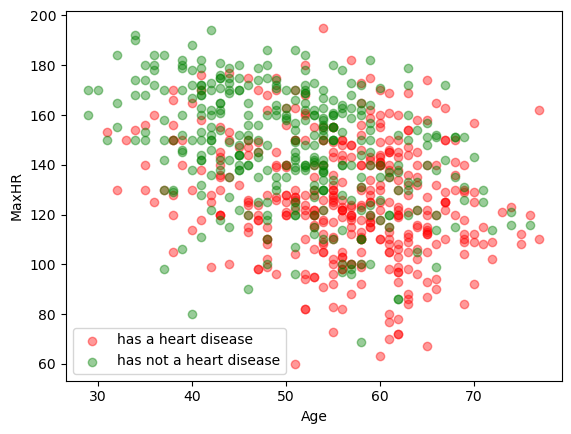

398 have a heart disease 

336 do not have a heart disease 



In [15]:
# yes = heart disease, no = has not a heart disease
yes = df[df.HeartDisease == 1]
no = df[df.HeartDisease == 0]

# Compare of Age and MaxHR
plt.scatter(yes.Age,yes.MaxHR,color='red',label='has a heart disease',alpha=0.4)
plt.scatter(no.Age,no.MaxHR,color='green',label='has not a heart disease',alpha=0.4)
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.legend()
plt.show()

print("{} have a heart disease \n".format(len(yes)))
print("{} do not have a heart disease \n".format(len(no)))

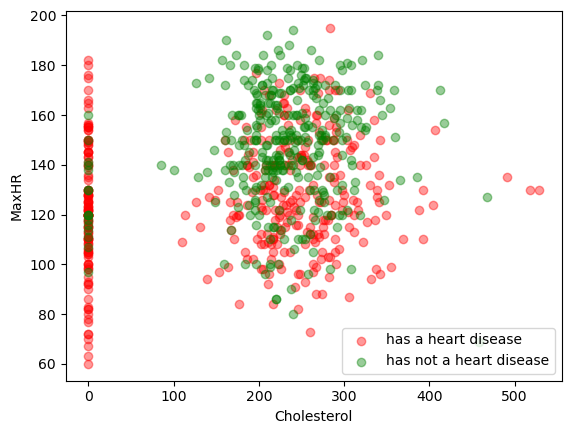

In [16]:
# Compare of Cholesterol and MaxHR
plt.scatter(yes.Cholesterol,yes.MaxHR,color='red',label='has a heart disease',alpha=0.4)
plt.scatter(no.Cholesterol,no.MaxHR,color='green',label='has not a heart disease',alpha=0.4)
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")
plt.legend()
plt.show()

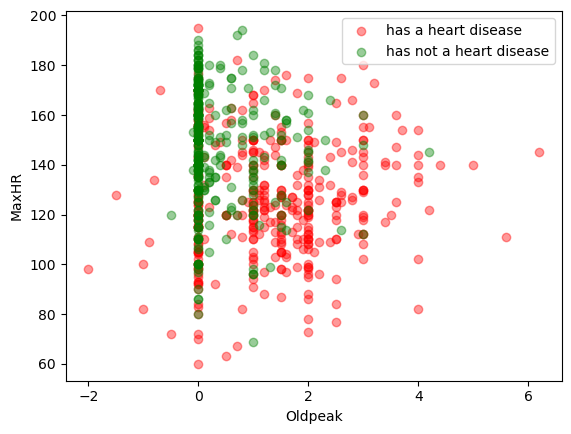

In [120]:
# Compare of Oldpeak and MaxHR
plt.scatter(yes.Oldpeak,yes.MaxHR,color='red',label='has a heart disease',alpha=0.4)
plt.scatter(no.Oldpeak,no.MaxHR,color='green',label='has not a heart disease',alpha=0.4)
plt.xlabel("Oldpeak")
plt.ylabel("MaxHR")
plt.legend()
plt.show()

Testset

In [17]:
testset = pd.read_csv("test_split.csv")

Q2: Logistic Lasso Regression (5 Pts)

By design, linear models are interpretable due to the weights that intuitively provide feature importance values. Further, we can perform l1 regularization to sparsify weights, allowing us to understand which features do not contribute to the outcome. For this question, fit a Lasso regression model with l1 regularization on the dataset. What preprocessing step is crucial to ensure comparability of feature coefficients? Provide performance metrics such as f1-score or balanced accuracy to quantify the performance of this model. Visualize the importance of the different features and present how they contribute to the model's output. Finally, argue for or against fitting a logistic regression using only the important variables, as determined by the Lasso model, to arrive at the final coefficients instead of keeping the coefficients of the Lasso model.

In [18]:
# One Hot Encoding
string_col = df.select_dtypes(include="object").columns

df_ohe = pd.get_dummies(df,columns=string_col,drop_first=False)
test_ohe = pd.get_dummies(testset,columns=string_col,drop_first=False)

In [19]:
df_ohe.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   37        130          283          0     98      0.0             0   
2   48        138          214          0    108      1.5             1   
3   54        150          195          0    122      0.0             0   
4   39        120          339          0    170      0.0             0   

   Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  ChestPainType_TA  \
0      0      1                  0  ...                  0                 0   
1      0      1                  0  ...                  0                 0   
2      1      0                  1  ...                  0                 0   
3      0      1                  0  ...                  1                 0   
4      0      1                  0  ...                  1                 0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  0              1                 1   
2               0                  1              0                 0   
3               0                  1              0                 1   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              0            1  
2                 1              0              1            0  
3                 0              0              0            1  
4                 0              0              0            1  

[5 rows x 21 columns]

In [20]:
# Training Set
y_train = df_ohe.HeartDisease.values
x_train_pre = df_ohe.drop(['HeartDisease'],axis=1)
x_train_pre.shape

(734, 20)

In [21]:
# Test Set
y_test = test_ohe.HeartDisease.values
x_test_pre = test_ohe.drop(['HeartDisease'],axis=1)
x_test_pre.shape

(184, 20)

In [22]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train_pre)
x_test = scaler.transform(x_test_pre)

In [28]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Model
lr = LogisticRegression(penalty="l1", C=1, tol=0.01, solver="saga")

# Train
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

Q2: Metrics on Validation Set

In [24]:
from sklearn.metrics import confusion_matrix, f1_score, balanced_accuracy_score

# Accuracy
print("Accuracy of Logistic Regression: {}\n".format(lr.score(x_test,y_test)))

# Balanced Accuracy
print("Balanced Accuracy of Logistic Regression: {}\n".format(balanced_accuracy_score(y_test,y_pred)))

# F1-Score
print("F1-Score of Logistic Regression: {}\n".format(f1_score(y_test,y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of loigistic regression:\n {}".format(cm))

Accuracy of Logistic Regression: 0.842391304347826

Balanced Accuracy of Logistic Regression: 0.8283783783783785

F1-Score of Logistic Regression: 0.8722466960352422

Confusion matrix of loigistic regression:
 [[56 18]
 [11 99]]


Feature Selection

In [25]:
# only use selected features
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(lr, prefit=True)
x_train_new = model.fit_transform(x_train)
x_test_new = model.transform(x_test)

x_train_new.shape
print("Selected Features")
selected = model.get_support()
print(x_train_pre.columns[selected])

Selected Features
Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [26]:
x_train_new.shape

(734, 19)

In [27]:
# Train
lr.fit(x_train_new,y_train)

y_pred_new = lr.predict(x_test_new)

# Accuracy
print("Accuracy of Logistic Regression: {}\n".format(lr.score(x_test_new,y_pred_new)))

# Balanced Accuracy
print("Balanced Accuracy of Logistic Regression: {}\n".format(balanced_accuracy_score(y_test,y_pred_new)))

# F1-Score
print("F1-Score of Logistic Regression: {}\n".format(f1_score(y_test,y_pred_new)))

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred_new)
print("Confusion matrix of loigistic regression:\n {}".format(cm))

Accuracy of Logistic Regression: 1.0

Balanced Accuracy of Logistic Regression: 0.8283783783783785

F1-Score of Logistic Regression: 0.8722466960352422

Confusion matrix of loigistic regression:
 [[56 18]
 [11 99]]


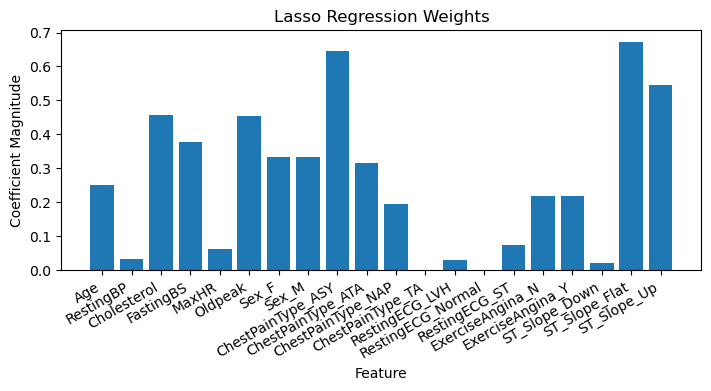

In [29]:
# interpretablity
# coefficients based on the model trained with all features 
# for reproducability run the model again with all features

# Extract the coefficients
coef = lr.coef_[0]

# Plot the coefficients
fig = plt.figure()
ax = fig.add_axes([0,0,1,0.5])
ax.bar(x_train_pre.columns,np.abs(coef))
plt.title('Lasso Regression Weights')
plt.xlabel('Feature')
plt.ylabel('Coefficient Magnitude')
plt.xticks(rotation=30, ha='right')
plt.show()

Q3: Decision Trees (3 Pts)

Like linear models, decision trees are intrinsically interpretable models by nature. For a given output, we can retrace every decision that led to the final prediction by following the path of a sample along the edges of the tree. Further, the models' impurity measure allows us to quantify feature importance within the dataset. As in the previous question, train a decision tree on the dataset and report classification performance on the test set. Visualize the influence of the different features according to the Gini importance.

In [30]:
# Label Encoding For Tree Based Algorithms
from sklearn.preprocessing import LabelEncoder

df_tree = df.apply(LabelEncoder().fit_transform)
test_tree = testset.apply(LabelEncoder().fit_transform)

df_tree.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   11    1              1         39          138          0           1   
1    8    1              1         29          133          0           2   
2   19    0              0         37           64          0           1   
3   25    1              2         47           45          0           1   
4   10    1              2         21          177          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     97               0        8         2             0  
1     24               0        8         2             0  
2     33               1       23         1             1  
3     47               0        8         2             0  
4     95               0        8         2             0

In [31]:
# Training Set
y_train = df_tree.HeartDisease.values
x_train = df_tree.drop(['HeartDisease'],axis=1)

In [32]:
# Test Set
y_test = test_tree.HeartDisease.values
x_test = test_tree.drop(['HeartDisease'],axis=1)

In [33]:
# Classifier
from sklearn.tree import DecisionTreeClassifier

# Model using Gini impurity as default
dt = DecisionTreeClassifier()

# Train
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

Q3: Metrics on Validation Set

In [34]:
# Accuracy
print("Accuracy of Decision Tree: {}\n".format(dt.score(x_test,y_pred)))

# Balanced Accuracy
print("Balanced Accuracy of Decision Tree: {}\n".format(balanced_accuracy_score(y_test,y_pred)))

# F1-Score
print("F1-Score of Decision Tree: {}\n".format(f1_score(y_test,y_pred)))

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of Decision Tree:\n {}".format(cm))

Accuracy of Decision Tree: 1.0

Balanced Accuracy of Decision Tree: 0.7013513513513514

F1-Score of Decision Tree: 0.7368421052631577

Confusion matrix of Decision Tree:
 [[52 22]
 [33 77]]


Interpretability

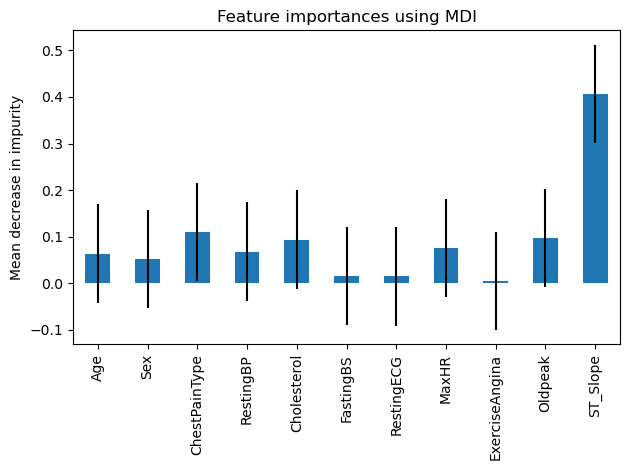

In [35]:
importances = dt.feature_importances_

tree_importances = pd.Series(importances, index=x_train.columns)
std=np.std(importances)

fig, ax = plt.subplots()
tree_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

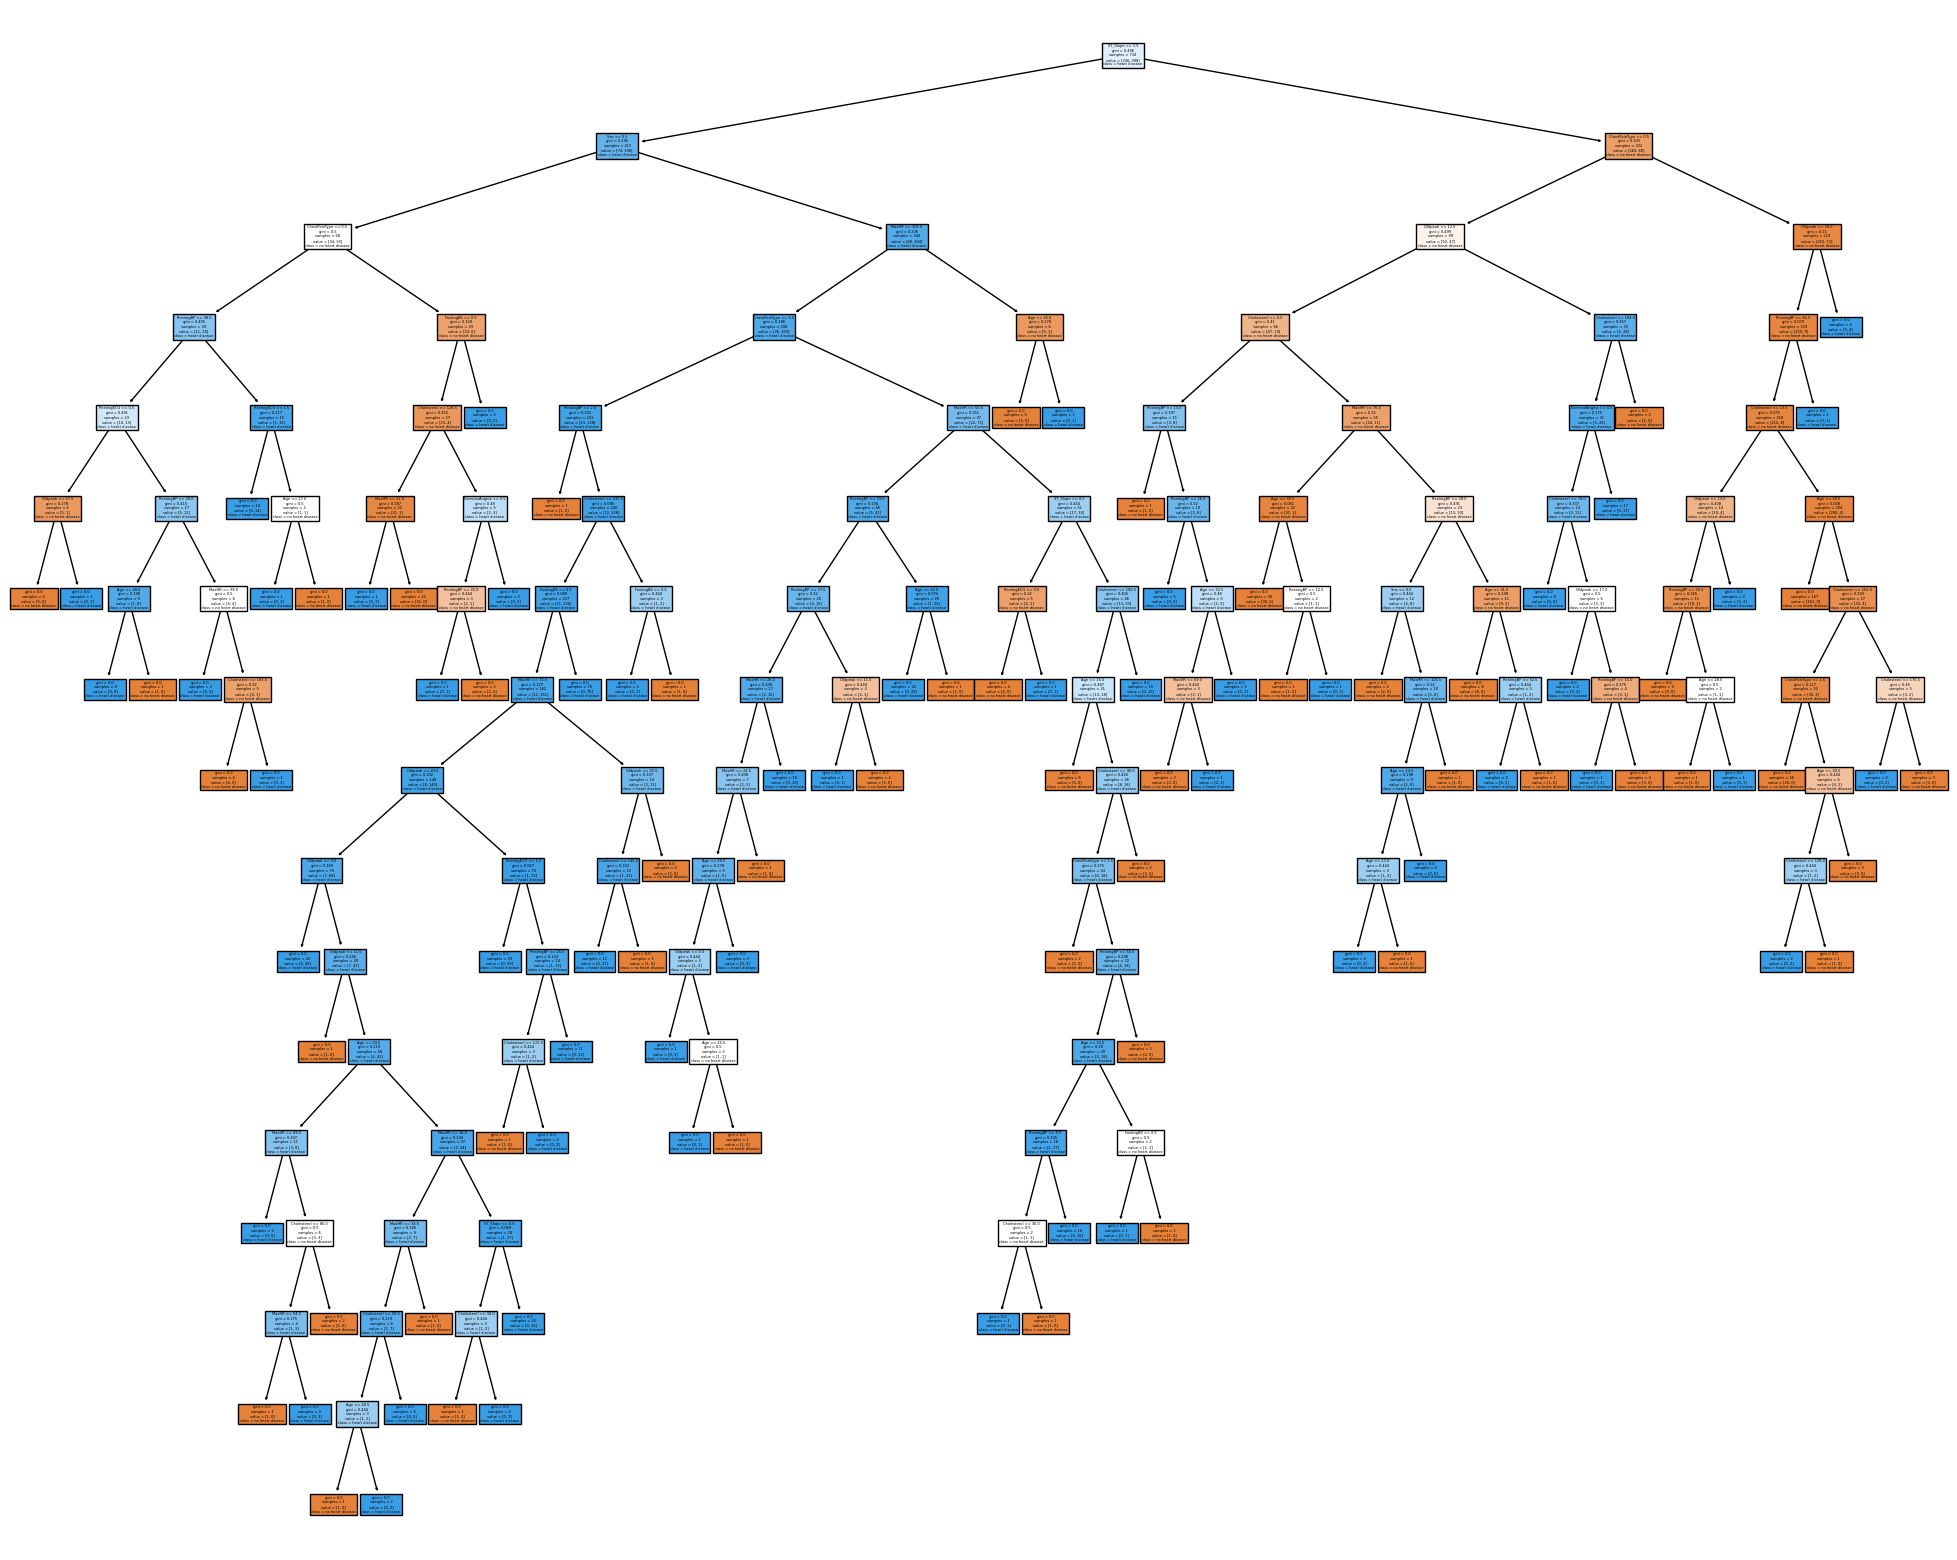

In [36]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=x_train.columns,  
                   class_names=['no heart disease', 'heart disease'],
                   filled=True)

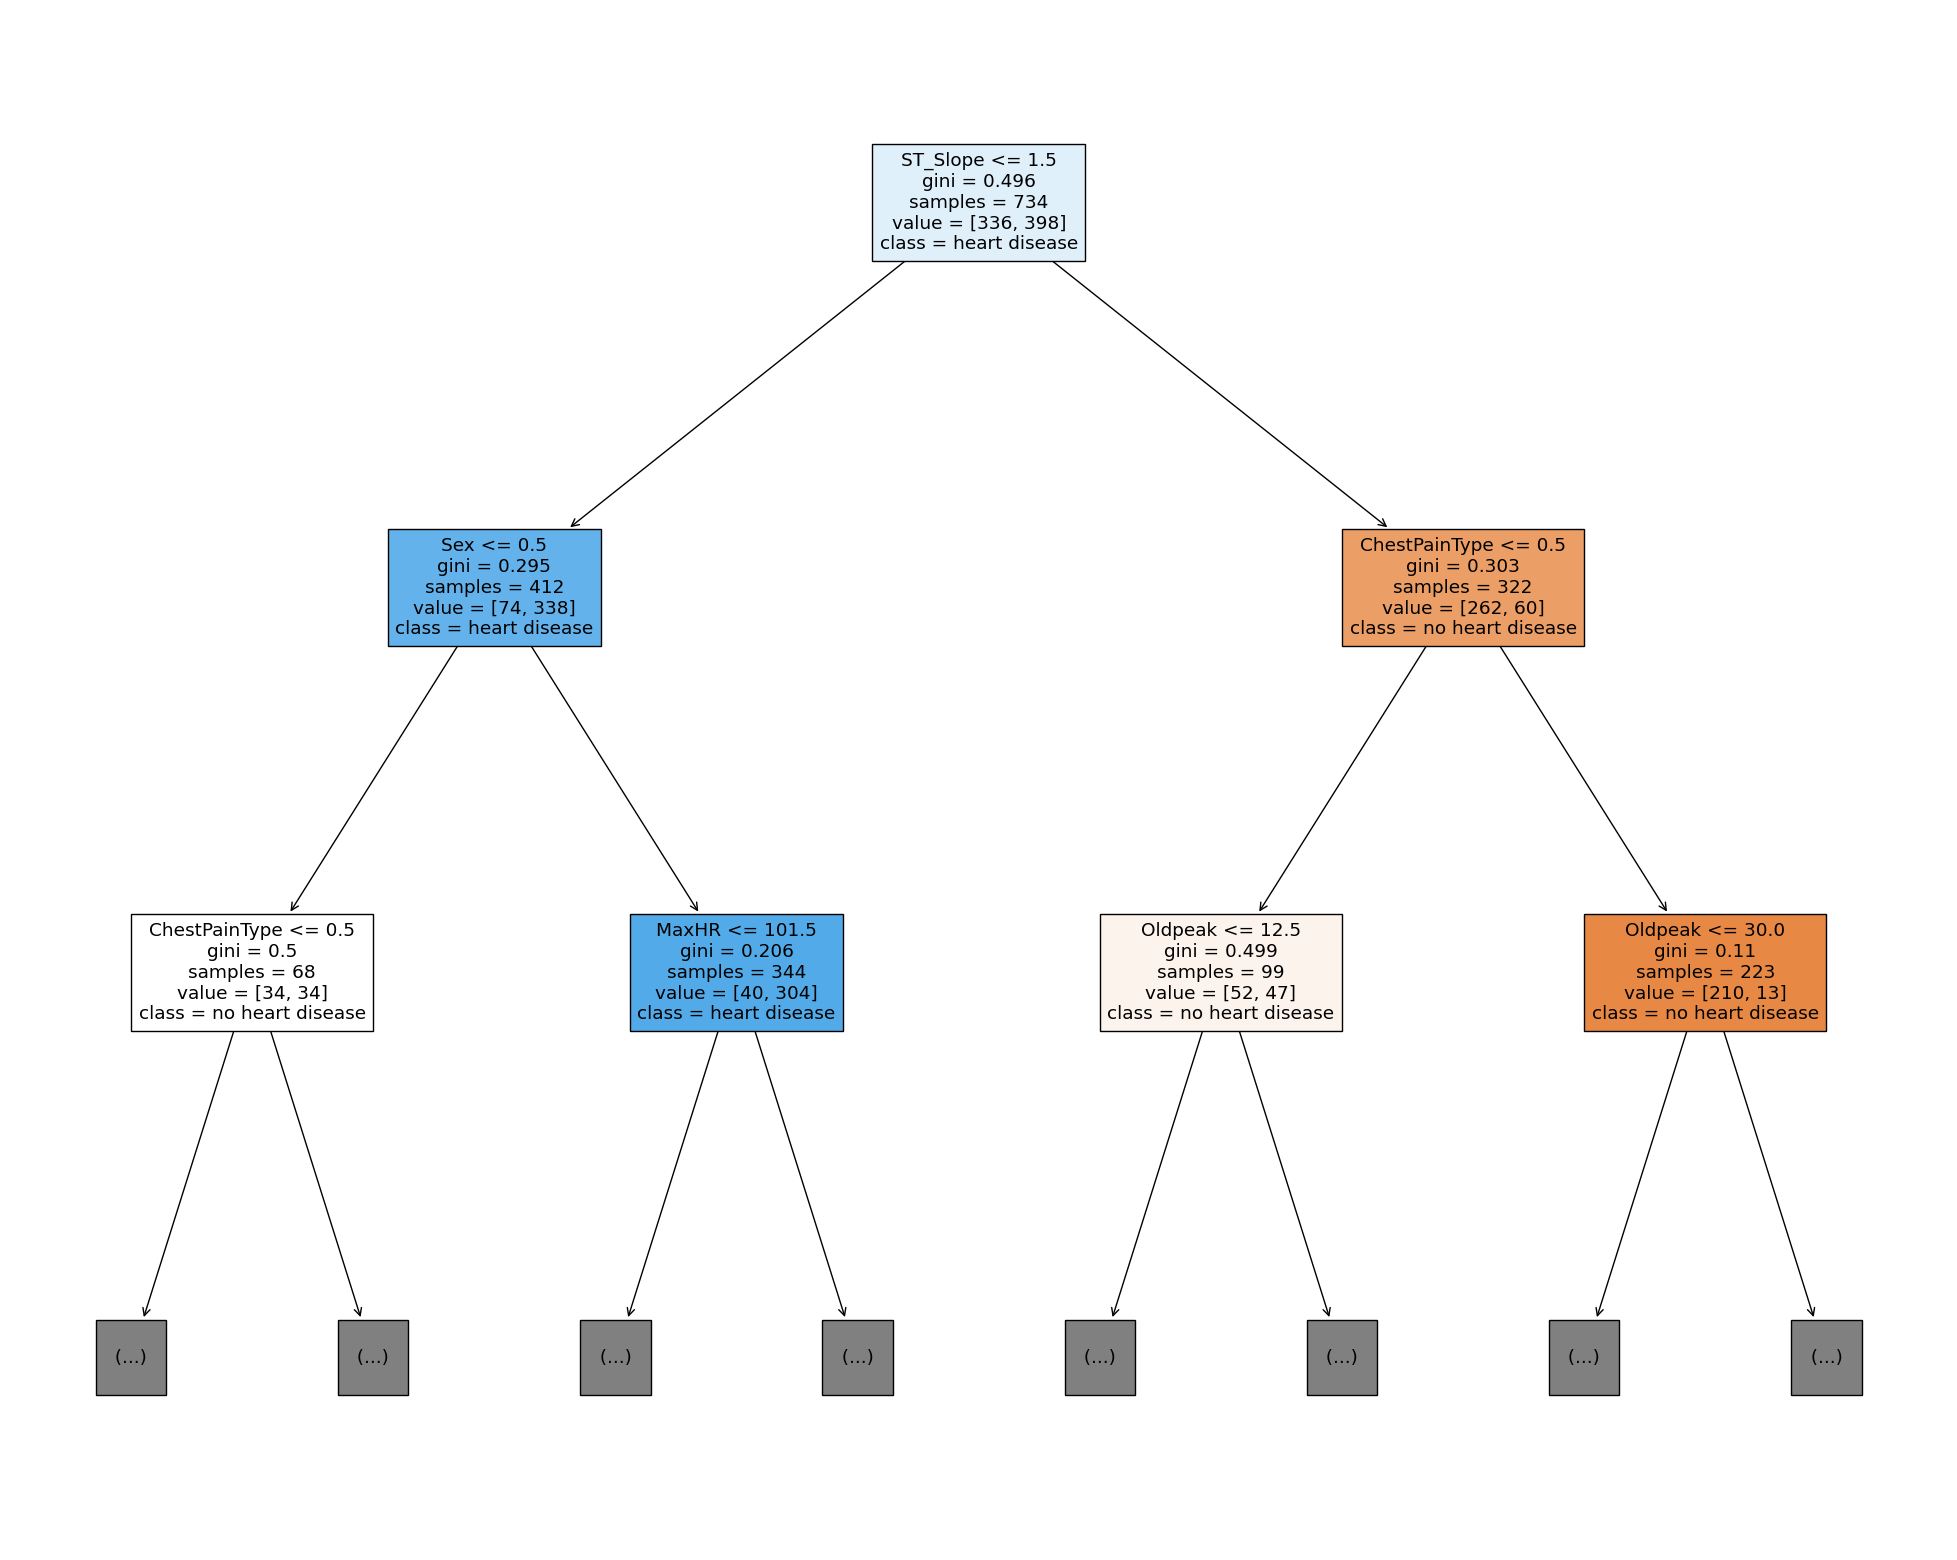

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=x_train.columns,  
                   class_names=['no heart disease', 'heart disease'],
                   filled=True, 
                   max_depth=2)

Q4: Multi-Layer Perceptrons(7 Pts)

While often reaching superior performance, MLPs are generally hard to interpret, and it is not straightforward to see what is happening within these models. We thus opt for post-hoc explainability methods such as SHAP1. Post-hoc explainability methods typically use some procedure during inference to find the feature importance per sample. Similar to Q2 and Q3, implement a simple MLP, train it on the dataset, and report test set performance. Make sure to report the architecture and optimization procedure you used for training.
Further, visualize SHAP explanations of the outputs of four positive and negative samples and feature importances of the overall model. Are feature importances consistent across different predictions and compared to overall importance values? Elaborate on your findings!
Hint: There is an excellent SHAP library for python that provides many SHAP algorithms and visualizations out of the box.

In [38]:
# Definition
y_train = df_ohe.HeartDisease.values
x_train = df_ohe.drop(['HeartDisease'],axis=1)

y_test = test_ohe.HeartDisease.values
x_test = test_ohe.drop(['HeartDisease'],axis=1)

In [39]:
# Classifier
from sklearn.neural_network import MLPClassifier

# Model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate='adaptive', max_iter=2000) # learning rate, hidden layer size

In [40]:
# Train
mlp.fit(x_train.values,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate='adaptive',
              max_iter=2000)

Q4: Metrics on Validation Set

In [41]:
y_pred = mlp.predict(x_test)

# Accuracy
print("Accuracy of MLP: {}\n".format(mlp.score(x_test,y_test)))

# Balanced Accuracy
print("Balanced Accuracy of MLP: {}\n".format(balanced_accuracy_score(y_test,y_pred)))

# F1-Score
print("F1-Score of MLP: {}\n".format(f1_score(y_test,y_pred)))

# Confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of MPL:\n {}".format(cm))

Accuracy of MLP: 0.8315217391304348

Balanced Accuracy of MLP: 0.8148648648648649

F1-Score of MLP: 0.8646288209606987

Confusion matrix of MPL:
 [[54 20]
 [11 99]]


X has feature names, but MLPClassifier was fitted without feature names
X has feature names, but MLPClassifier was fitted without feature names


Interpretability

In [42]:
# Create object that can calculate shap values
explainer = shap.KernelExplainer(mlp.predict_proba, x_train)

Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [44]:
# Calculate Shap values
shap_values = explainer.shap_values(x_test)

# explain many prediction 
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test)

  0%|          | 0/184 [00:00<?, ?it/s]

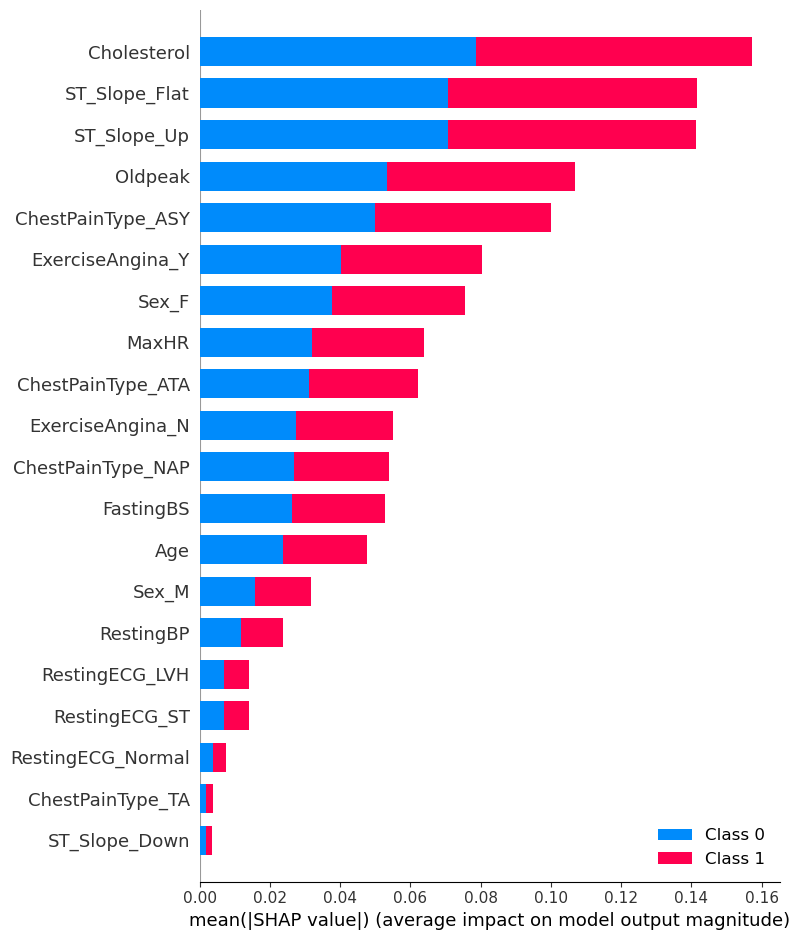

In [46]:
# explain 
shap.summary_plot(shap_values, x_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


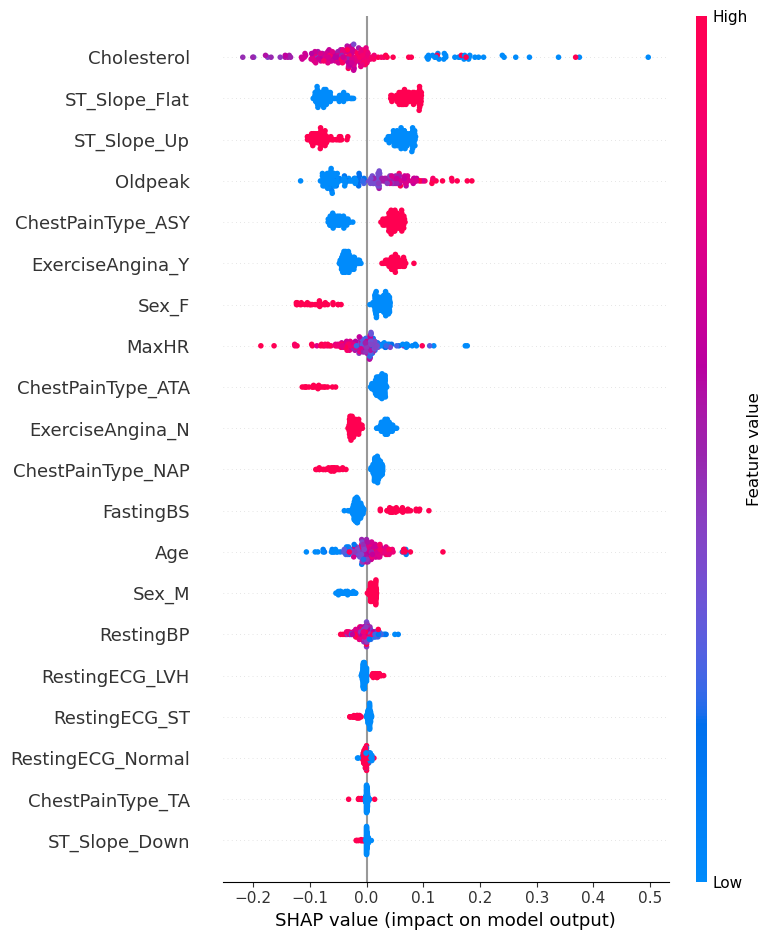

In [47]:
shap.summary_plot(shap_values = shap_values[1], features = x_test)

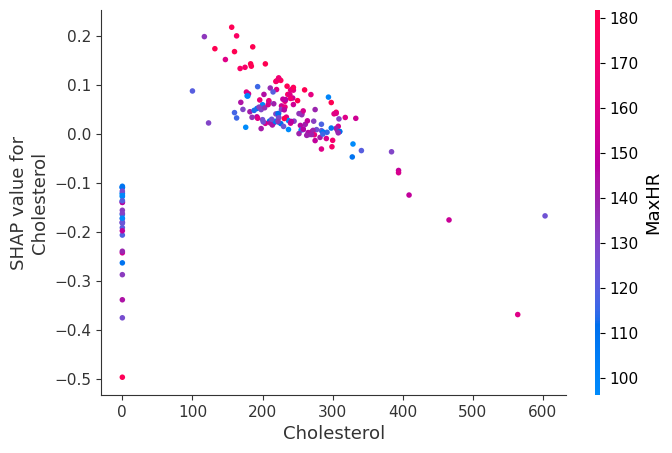

In [48]:
shap.dependence_plot("Cholesterol", shap_values[0], x_test)

In [49]:
# explain single prediction
shap_value_single = explainer.shap_values(x_test.values[0].T)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value_single[0], x_train.iloc[0,:])

4 positive and 4 negative samples

In [50]:
# select positive and negative samples
y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0])

In [51]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0])

In [52]:
positive = x_test.iloc[[0, 1, 3, 4]] # c, c, c, c
negative = x_test.iloc[[5, 6, 10, 13]] # r, c, c, c

shap_values[0] are explanations with respect to the negative class, while shap_values[1] are explanations with respect to the positive class

Positive Samples

In [53]:
shap_value_positive = explainer.shap_values(positive.values[0].T)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value_positive[1], x_test.iloc[0,:])

In [54]:
shap_value_positive = explainer.shap_values(positive.values[1].T)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value_positive[1], x_test.iloc[1,:])

In [55]:
shap_value_positive = explainer.shap_values(positive.values[2].T)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value_positive[1], x_test.iloc[3,:])

In [56]:
shap_value_positive = explainer.shap_values(positive.values[3].T)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_value_positive[1], x_test.iloc[4,:])

Negative Samples

In [57]:
shap_value_negative = explainer.shap_values(negative.values[0].T)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value_negative[0], x_test.iloc[5,:])

In [58]:
shap_value_negative = explainer.shap_values(negative.values[1].T)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value_negative[0], x_test.iloc[6,:])

In [59]:
shap_value_negative = explainer.shap_values(negative.values[2].T)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value_negative[0], x_test.iloc[10,:])

In [60]:
shap_value_negative = explainer.shap_values(negative.values[3].T)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_value_negative[0], x_test.iloc[13,:])